In [1]:
# news classification
# classifying news headlines by text classification

# | class values

# entertainment (e), business (b), science & technology (t), health (m)

# | attributes

# title

In [2]:
# data science libraries
# pandas: for analyzing and manipulating datasets
import pandas as pd

# numpy: library for arrays and additional mathematical functions
import numpy as np

# matplotlib: data visualizer
import matplotlib.pyplot as plt

# texthero: a library used for manipulating text data
import texthero as hero

# Natural Language Toolkit: for symbolic and statistical natural language processing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# seaborn: a visualization library based on matplotlib
import seaborn as sn

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# scikit-learn: tool for predictive data analysis
from sklearn.model_selection import train_test_split # split arrays into random train and test sets
from sklearn import metrics # for classifier performance metrics

from collections import Counter # counting hashable (immutable) objects

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
### procedure: data preparation
# specifies the existing names of the columns
col_names = ['title','category']
# read_csv: read a comma-seperated values file into Dataframe
# dataframe: two-dimensional labeled data structure with columsn of (mostly) different types
news_headlines = pd.read_csv('newsCorpora_with_header.csv', names=col_names, sep="\t", skiprows=[0])

In [4]:
news_headlines.head(6) # print the initial 6 rows of the dataframe

,title,category
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
5,Plosser: Fed May Have to Accelerate Tapering Pace,b


In [5]:
### procedure: data preprocessing
# clean command: lowercase, remove accents, remove punctuations, remove stop words, remove digits, fill NA, remove white space
news_headlines['title'] = hero.clean(news_headlines['title'])
news_headlines.head(6) # get the initial 6 rows

,title,category
0,fed official says weak data caused weather slo...,b
1,fed charles plosser sees high bar change pace ...,b
2,us open stocks fall fed official hints acceler...,b
3,fed risks falling behind curve charles plosser...,b
4,fed plosser nasty weather curbed job growth,b
5,plosser fed may accelerate tapering pace,b


In [6]:
# WordNetLemmatizer
# lemmetization is the process used in NLP that switches any kind of a word to its base root mode
# lemmetization is responsible for grouping different inflected forms of words into the root form, having the same meaning
#~ example : "I ate an apple" -> "I eat a apple"
wl = WordNetLemmatizer()
def word_lemmatizer(text):
    # tokenize each row
    tokens = nltk.word_tokenize(text)
    # lemmatize each word in a row
    tokens = [wl.lemmatize(token) for token in tokens]
    # return the words together to the row
    return ' '.join(tokens)

# apply a function along an axis of the dataframe
news_headlines['title'] = news_headlines['title'].apply(word_lemmatizer)
news_headlines['title'].head(5) # get the initial 5 rows

0    fed official say weak data caused weather slow...
1    fed charles plosser see high bar change pace t...
2    u open stock fall fed official hint accelerate...
3    fed risk falling behind curve charles plosser say
4          fed plosser nasty weather curbed job growth
Name: title, dtype: object

In [7]:
# check for numbers of set
news_headlines.count()

title       422937
category    422937
dtype: int64

In [8]:
# check for missing values
news_headlines.isna().sum()

title       0
category    0
dtype: int64

In [9]:
# specifies the features and target from the dataset
x = news_headlines.drop(['category'], axis=1) # feature
y = news_headlines['category'] # target

In [19]:
### procedure: dimensionality reduction
# controls: less complexity, less disk space, less computation time, lower chance of model overfitting

# feature extraction: transforms an arbitrary data, such as text, into numerical features that is understood by ml models
# tfidfvectorizer: convert a collection of raw documents to a matrix of tfidf features
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize tfidf vectorizer
tfidf = TfidfVectorizer()

# perform the calculation on the feature "title"
x = tfidf.fit_transform(news_headlines['title'])

In [20]:
# feature selection: selection of features which contribute most to the desired prediction variable or output
# variancethreshold: removes all the features whose variance does not meet the threshold
from sklearn.feature_selection import VarianceThreshold

# initialize variancethreshold
selection = VarianceThreshold(threshold=0.001)

# perform the calculation on the feature "title"
x = selection.fit_transform(x)

In [30]:
# split the dataset into training set and test set
# test split = 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=0)

Normal Class Distribution:  Counter({'e': 106983, 'b': 80855, 't': 76344, 'm': 31873})


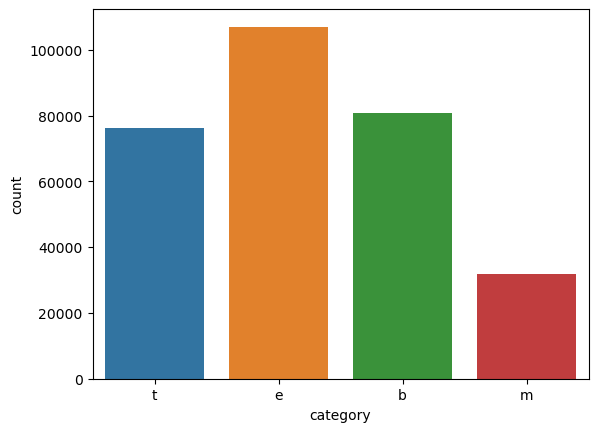

In [37]:
# class distribution
print('Normal Class Distribution: ', Counter(y_train))

# countplot class distribution
sn.countplot(x=y_train)

# show plot
plt.show()

In [39]:
# class imbalance problem: biased classification towards the majority class, which causes bad classification of the minority class
# sampling data for class balance
# using oversampling technique: supplementing the training data with multiple copies of some of the minority class

# randomoversampler: picking samples at random with replacement
from imblearn.over_sampling import RandomOverSampler

# initialize randomoversampler
over_sampler = RandomOverSampler(random_state=42)

# perform the calculation on the train sets
x_res, y_res = over_sampler.fit_resample(x_train, y_train)

Oversamplings:  Counter({'t': 106983, 'e': 106983, 'b': 106983, 'm': 106983})


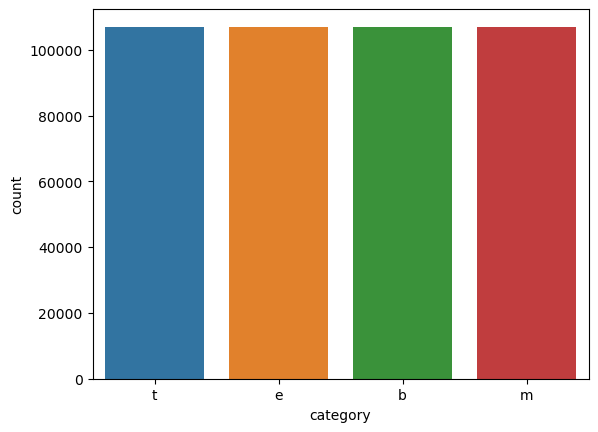

In [41]:
# oversamplings
print('Oversamplings: ', Counter(y_res))

# countplot class distribution
sn.countplot(x=y_res)

# show plot
plt.show()

In [16]:
# classification report: build a text report shoing the main classification metrics
from sklearn.metrics import classification_report

# specifies the targets names
targets = ['business','entertainment','health','science & technology']

In [17]:
# import decision tree classifier
# classification tree for categorical dataset
from sklearn.tree import DecisionTreeClassifier

# dtc classifier with split measurement gini
dtc = DecisionTreeClassifier(criterion='gini')

# start generating model
dtc = dtc.fit(x_res, y_res)
# model evaluation
y_pred = dtc.predict(x_test)

In [18]:
# check for model accuracy, precision, and recall

# accuracy score %
score = metrics.accuracy_score(y_test, y_pred);
print('Accuracy: ', round(score * 100, 2), '%')

# classification report
print(classification_report(y_test,y_pred, target_names=targets))

Accuracy:  38.71 %
                      precision    recall  f1-score   support

            business       0.60      0.27      0.37     35112
       entertainment       0.72      0.32      0.44     45845
              health       0.15      0.77      0.25     13766
science & technology       0.70      0.46      0.55     32159

            accuracy                           0.39    126882
           macro avg       0.54      0.45      0.40    126882
        weighted avg       0.62      0.39      0.43    126882



In [19]:
# import naive bayes classifier
# multinomial naive bayes classifier for text 
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# start generating model
nb = nb.fit(x_res, y_res)

# evaluate model
mnb_y_pred = nb.predict(x_test)

In [20]:
# check for model accuracy, precision, and recall

# accuracy score %
score = metrics.accuracy_score(y_test, mnb_y_pred);
print('Accuracy: ', round(score * 100, 2), '%'
      
# classification report
print(classification_report(y_test, mnb_y_pred, target_names=targets))

Accuracy:  44.93 %
                      precision    recall  f1-score   support

            business       0.36      0.80      0.50     35112
       entertainment       0.83      0.28      0.42     45845
              health       0.17      0.24      0.20     13766
science & technology       0.87      0.40      0.55     32159

            accuracy                           0.45    126882
           macro avg       0.56      0.43      0.42    126882
        weighted avg       0.64      0.45      0.45    126882



In [21]:
# import neural networking classifier
# multi-layer perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver="adam", alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1, max_iter=400)

# start generating model
mlp = mlp.fit(x_res, y_res)

# model evaluation
p_y_pred = mlp.predict(x_test)

In [22]:
# check for model accuracy, precision, and recall
# accuracy score %
score = metrics.accuracy_score(y_test, p_y_pred);
print('Accuracy: ', round(score * 100, 2), '%')

# classification report
print(classification_report(y_test,p_y_pred, target_names=targets))

Accuracy:  34.43 %
                      precision    recall  f1-score   support

            business       0.46      0.10      0.16     35112
       entertainment       0.80      0.30      0.44     45845
              health       0.15      0.82      0.25     13766
science & technology       0.62      0.47      0.53     32159

            accuracy                           0.34    126882
           macro avg       0.51      0.42      0.35    126882
        weighted avg       0.59      0.34      0.37    126882



In [ ]:
# confusion matrix: an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes
# CM uses the actual and predicted labels to assess the positive classes and negatives classess
from sklearn import metrics

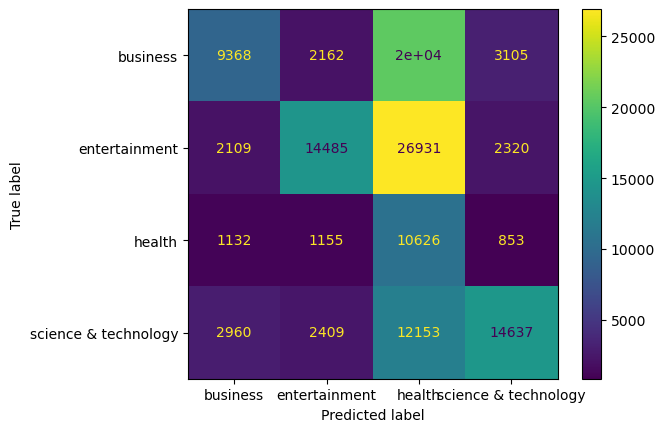

In [23]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=['b','e','m','t'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=targets)
cm_display.plot()
plt.show()

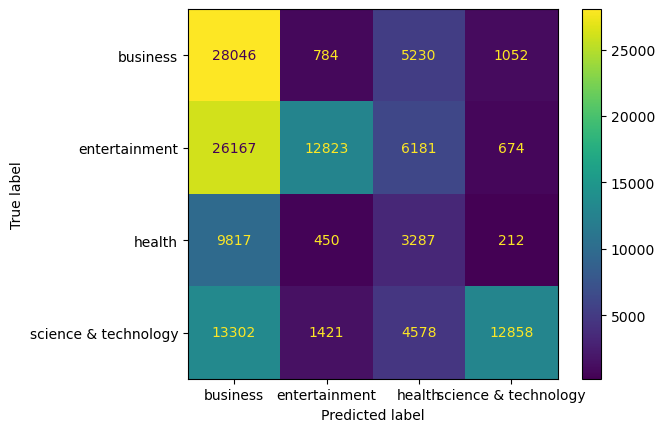

In [24]:
cm_1 = metrics.confusion_matrix(y_test, mnb_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=targets)
cm_display.plot()
plt.show()

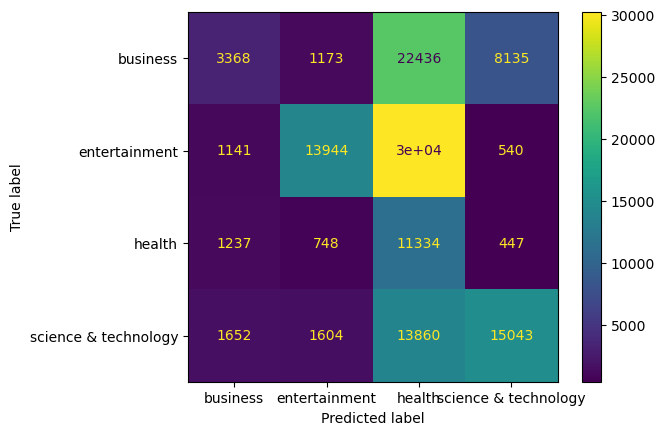

In [25]:
cm_2 = metrics.confusion_matrix(y_test, p_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=targets)
cm_display.plot()
plt.show()